<a href="https://colab.research.google.com/github/BiancadeFrancisco/Analise_Educacao/blob/main/EDUCA%C3%87%C3%83O_CURSO_UDEMY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/StudentsPerformance+(1).csv')

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.shape

(1000, 8)

In [ ]:
# VERIFICAR NULOS:

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
# VERIFICAR CAMPOS UNICOS:

df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [ ]:
# VERIFICAR DADOS DUPLICADOS:

df.duplicated().sum()

0

In [ ]:
# VERIFICAR ESTATÍSTICAS:

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
df.rename(columns = {
    'gender':'sexo',
    'race/ethnicity': 'raça/etinia',
    'parental level of education': 'escolaridade_dos_Pais',
    'lunch': 'almoço',
    'test preparation course': 'curso_preparatorio',
    'math score': 'nota_matematica',
    'reading score': 'nota_leitura',
    'writing score': 'nota_redaçao'
}, inplace = True)

In [ ]:
df

,sexo,raça/etinia,escolaridade_dos_Pais,almoço,curso_preparatorio,nota_matematica,nota_leitura,nota_redaçao
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
# VERIFICAR ANÁLISES DE DADOS:

df['sexo'].value_counts(normalize=True) * 100

female    51.8
male      48.2
Name: sexo, dtype: float64

In [ ]:
# VERIFICAR ANÁLISES DE DADOS:

df['raça/etinia'].value_counts(normalize=True) * 100

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: raça/etinia, dtype: float64

In [ ]:
# VERIFICAR ANÁLISES DE DADOS:

df['escolaridade_dos_Pais'].value_counts(normalize=True) * 100

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: escolaridade_dos_Pais, dtype: float64

In [ ]:
# VERIFICAR ANÁLISES DE DADOS:

df['curso_preparatorio'].value_counts(normalize=True) * 100

none         64.2
completed    35.8
Name: curso_preparatorio, dtype: float64

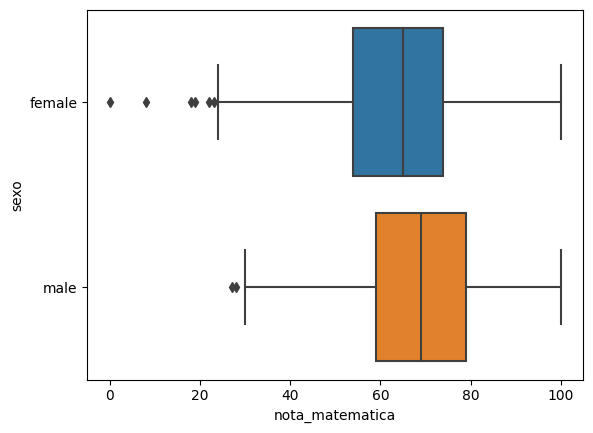

In [ ]:
# ANÁLISES COM GRÁFICOS:

sns.boxplot(data=df, x='nota_matematica', y='sexo');

# podemos ver que algumas mulheres zeraram na prova de matemática
# homens com performance melhor

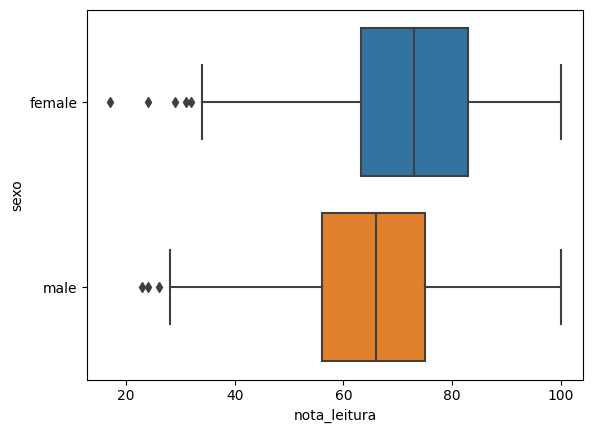

In [ ]:
# ANÁLISES COM GRÁFICOS:

sns.boxplot(data=df, x='nota_leitura', y='sexo');

# mulheres com melhor performance

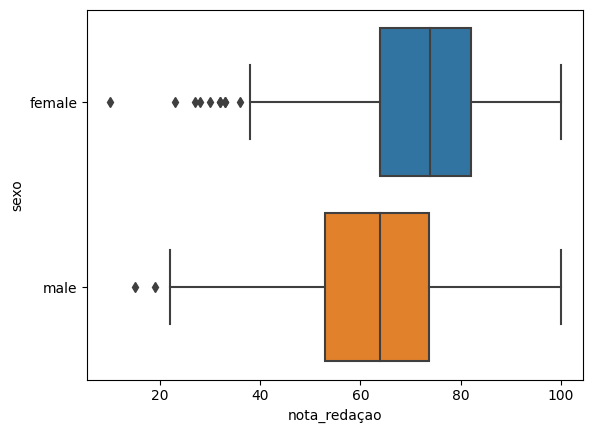

In [ ]:
# ANÁLISES COM GRÁFICOS:

sns.boxplot(data=df, x='nota_redaçao', y='sexo');

# mulheres com melhor performance

In [ ]:
df.groupby(by=['sexo']).describe()['nota_matematica'].reset_index()

,sexo,count,mean,std,min,25%,50%,75%,max
0,female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
1,male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


In [ ]:
df.groupby(by=['sexo']).describe()['nota_leitura'].reset_index()

,sexo,count,mean,std,min,25%,50%,75%,max
0,female,518.0,72.608108,14.378245,17.0,63.25,73.0,83.0,100.0
1,male,482.0,65.473029,13.931832,23.0,56.00,66.0,75.0,100.0


In [ ]:
df.groupby(by=['sexo']).describe()['nota_redaçao'].reset_index()

,sexo,count,mean,std,min,25%,50%,75%,max
0,female,518.0,72.467181,14.844842,10.0,64.0,74.0,82.00,100.0
1,male,482.0,63.311203,14.113832,15.0,53.0,64.0,73.75,100.0


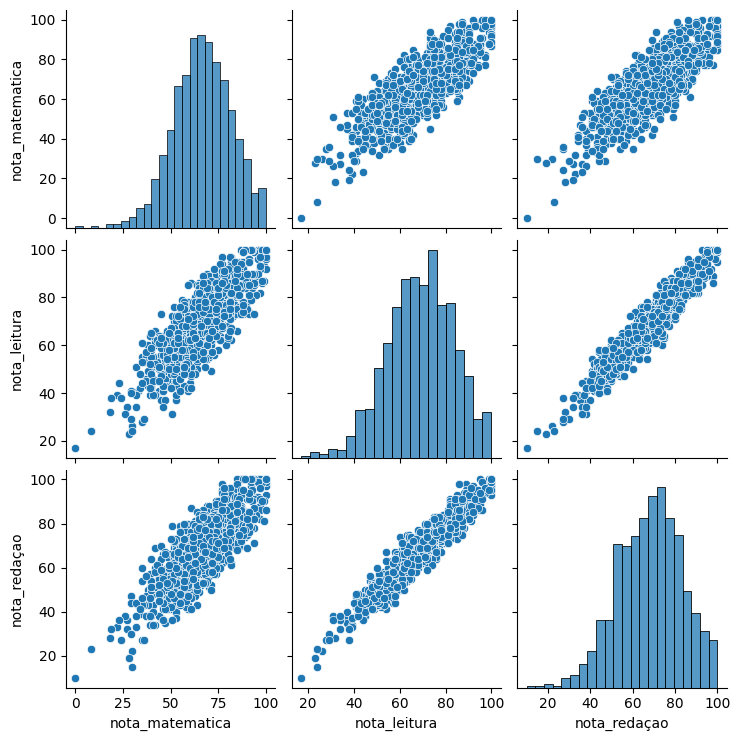

In [ ]:
sns.pairplot(df);

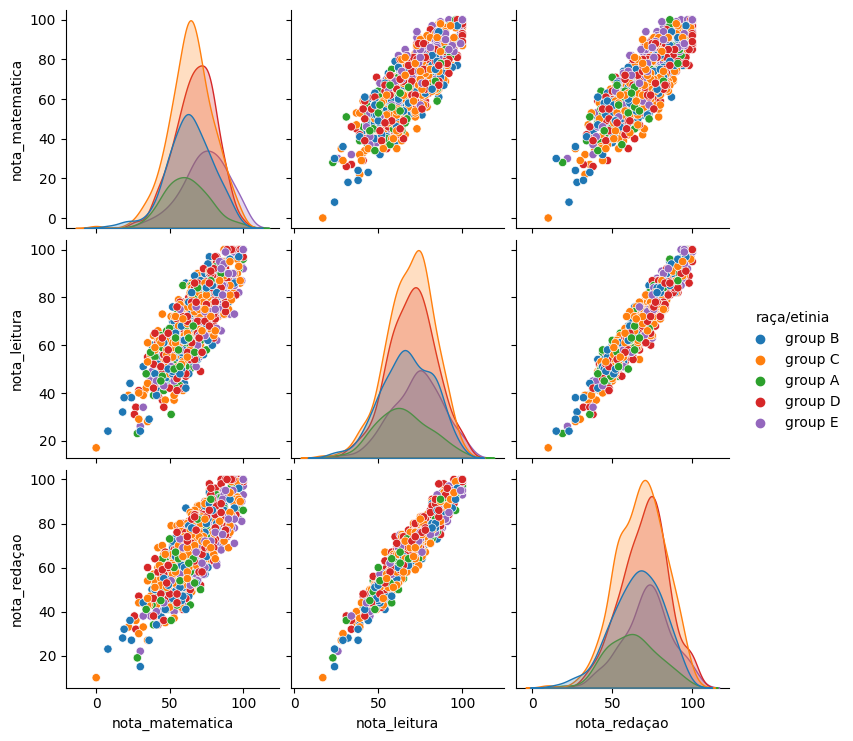

In [ ]:
sns.pairplot(df, hue='raça/etinia');

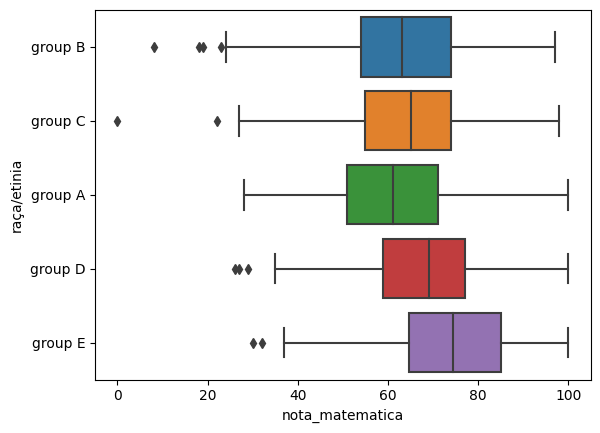

In [ ]:
sns.boxplot(data = df, x= 'nota_matematica', y='raça/etinia');

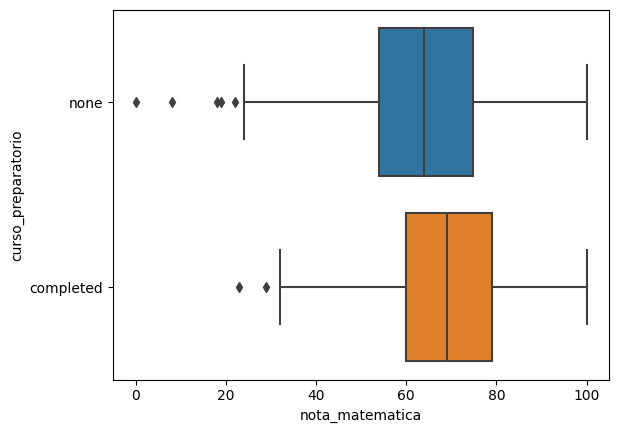

In [ ]:
sns.boxplot(data = df, x= 'nota_matematica', y='curso_preparatorio');

In [ ]:
df.groupby(by=['curso_preparatorio']).describe()['nota_matematica'].reset_index()

,curso_preparatorio,count,mean,std,min,25%,50%,75%,max
0,completed,358.0,69.695531,14.444699,23.0,60.0,69.0,79.00,100.0
1,none,642.0,64.077882,15.192376,0.0,54.0,64.0,74.75,100.0


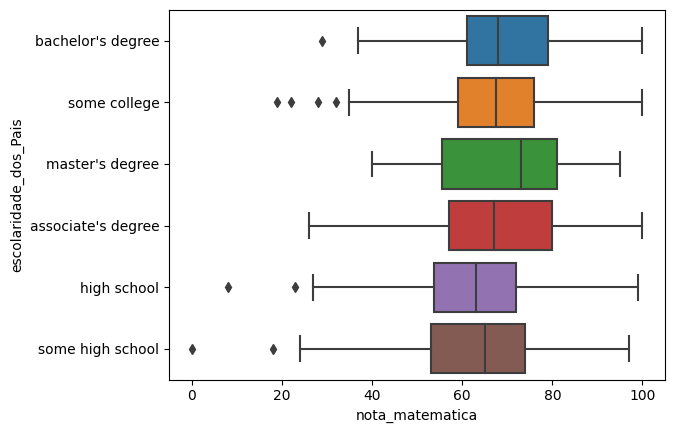

In [ ]:
sns.boxplot(data = df, x= 'nota_matematica', y='escolaridade_dos_Pais');

In [ ]:
df.groupby(by=['escolaridade_dos_Pais']).describe()['nota_matematica'].reset_index()

,escolaridade_dos_Pais,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
1,bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
2,high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
3,master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
4,some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
5,some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


<Axes: xlabel='nota_matematica', ylabel='nota_redaçao'>

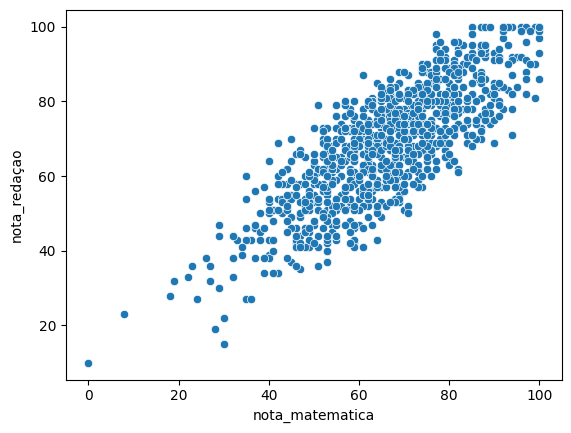

In [ ]:
sns.scatterplot( data=df, x='nota_matematica', y='nota_redaçao')